# Project: [candy data 2017]

## Table of Contents:
<ul>
<li><a href="#Descrip"> Dataset Description </a></li>
<li><a href="#Explor">Exploring</a></li>
<li><a href="#Explor Sum">Exploring Summary</a></li>
<li><a href="#clean">Cleaninig and visualization</a></li>    
<li><a href="#Conclusion">Conclusion</a></li>
</ul>

<a id='Descrip'></a>

## Dataset Description: 

> I will go through candy data 2017 , this data has :
- `Internal_ID`
- `Q1-Going Out?`: Are you actually going trick or treating yourself? "has values `Yes or No`"
- `Q2-Gender`: It has four different options, `Femal ,Male ,Other ,I'd rather not say`
- `Q3-Age`: Numerical field
- `Q4-Country`: Text Field, but users have written their own version of the names. Example, for America, there are entries such as USA, us, US, America so we should consider that while cleanning
- `Q5-State/Province`: Text Field, but users have written their own version of the names. Same as the country data.
- `Q6-Joy Or Despair`: All kinds of chocolate bars are the questions with three distinct options to choose from (Joy, Meh, Despair).
- `Q7-Joy Other`: Text Field to write items not included above that give you JOY. Lots of missing values.
- `Q8-Despair Other`: Text Field ti write items not included above that give you DESPAIR. Lots of missing values.
- `Q9-Other Comments`: Text Field. Lots of missing values.
- `Q10-Dress`: Binary field. Missing values present
- `Unnamed: 113`
- `Q11-Day`: Binary Answer Field. Missing values present


*The data & some info about it https://drive.google.com/drive/folders/1-ZJbM2oxdZ_emuEaILl2xErva0jKHZue?usp=sharing*

###  Import packages and load data

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore') # ignore warnings.
%config IPCompleter.greedy = True # autocomplete feature.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno
#import plotly.express as px
sns.set_style("darkgrid")
sns.set_context("poster")
plt.style.use('seaborn')

In [2]:
df=pd.read_excel("candyhierarchy2017.xlsx")

<a id='Explor'></a>

## Exploring Data:
> I will check the  things below to Understand the Dataset:

* shape of our dataset
* Head of the dataset
* Number of samples in each dataset
* Number of columns in each dataset
* Duplicate rows in each dataset
* Datatypes for every column
* Features with missing values
* Number of non-null unique values for features in each dataset
* What those unique values are and counts for each

In [3]:
# view dimensions of dataset
df.shape

(2460, 120)

### What is the structure of the dataset?

##### There are `2460` people in the dataset with `12` Question:

##### Most variables are qualitative.


In [4]:
# Make all columns appear
pd.set_option('display.max_columns', None)
# Viewing Data
df.head()

Internal ID Q1: GOING OUT? Q2: GENDER Q3: AGE Q4: COUNTRY  \
0     90258773            NaN        NaN     NaN         NaN   
1     90272821             No       Male      44        USA    
2     90272829            NaN       Male      49         USA   
3     90272840             No       Male      40          us   
4     90272841             No       Male      23         usa   

  Q5: STATE, PROVINCE, COUNTY, ETC Q6 | 100 Grand Bar  \
0                              NaN                NaN   
1                               NM                MEH   
2                         Virginia                NaN   
3                               or                MEH   
4                         exton pa                JOY   

  Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)  \
0                                                NaN                                       
1                                            DESPAIR                                       
2                                                NaN                                       
3                                            DESPAIR                                       
4                                            DESPAIR                                       

  Q6 | Any full-sized candy bar Q6 | Black Jacks Q6 | Bonkers (the candy)  \
0                           NaN              NaN                      NaN   
1                           JOY              MEH                  DESPAIR   
2                           NaN              NaN                      NaN   
3                           JOY              MEH                      MEH   
4                           JOY          DESPAIR                      MEH   

  Q6 | Bonkers (the board game) Q6 | Bottle Caps Q6 | Box'o'Raisins  \
0                           NaN              NaN                NaN   
1                       DESPAIR          DESPAIR            DESPAIR   
2                           NaN              NaN                NaN   
3                       DESPAIR              MEH            DESPAIR   
4                       DESPAIR              MEH            DESPAIR   

  Q6 | Broken glow stick Q6 | Butterfinger Q6 | Cadbury Creme Eggs  \
0                    NaN               NaN                     NaN   
1                DESPAIR           DESPAIR                     MEH   
2                    NaN               NaN                     NaN   
3                DESPAIR               MEH                     MEH   
4                DESPAIR               MEH                     MEH   

  Q6 | Candy Corn  \
0             NaN   
1             MEH   
2             NaN   
3         DESPAIR   
4         DESPAIR   

  Q6 | Candy that is clearly just the stuff given out for free at restaurants  \
0                                                NaN                            
1                                            DESPAIR                            
2                                                NaN                            
3                                            DESPAIR                            
4                                            DESPAIR                            

  Q6 | Caramellos Q6 | Cash, or other forms of legal tender Q6 | Chardonnay  \
0             NaN                                       NaN             NaN   
1             MEH                                       JOY             MEH   
2             NaN                                       NaN             NaN   
3             MEH                                       JOY             MEH   
4             JOY                                       MEH             JOY   

  Q6 | Chick-o-Sticks (we don‚Äôt know what that is) Q6 | Chiclets  \
0                                              NaN           NaN   
1                                          DESPAIR       DESPAIR   
2                                              NaN           NaN   
3                                              J

In [5]:
# turn every column name to lower case 
df.columns=df.columns.str.lower().str.replace(' ','_')
# checking new columns name
df.columns.tolist()

['internal_id',
 'q1:_going_out?',
 'q2:_gender',
 'q3:_age',
 'q4:_country',
 'q5:_state,_province,_county,_etc',
 'q6_|_100_grand_bar',
 'q6_|_anonymous_brown_globs_that_come_in_black_and_orange_wrappers\t(a.k.a._mary_janes)',
 'q6_|_any_full-sized_candy_bar',
 'q6_|_black_jacks',
 'q6_|_bonkers_(the_candy)',
 'q6_|_bonkers_(the_board_game)',
 'q6_|_bottle_caps',
 "q6_|_box'o'raisins",
 'q6_|_broken_glow_stick',
 'q6_|_butterfinger',
 'q6_|_cadbury_creme_eggs',
 'q6_|_candy_corn',
 'q6_|_candy_that_is_clearly_just_the_stuff_given_out_for_free_at_restaurants',
 'q6_|_caramellos',
 'q6_|_cash,_or_other_forms_of_legal_tender',
 'q6_|_chardonnay',
 'q6_|_chick-o-sticks_(we_don‚Äôt_know_what_that_is)',
 'q6_|_chiclets',
 'q6_|_coffee_crisp',
 'q6_|_creepy_religious_comics/chick_tracts',
 'q6_|_dental_paraphenalia',
 'q6_|_dots',
 'q6_|_dove_bars',
 'q6_|_fuzzy_peaches',
 'q6_|_generic_brand_acetaminophen',
 'q6_|_glow_sticks',
 'q6_|_goo_goo_clusters',
 "q6_|_good_n'_plenty",
 'q6_|_gum_f

###  I will devide the data into two parts for easy access

In [6]:
Data = [x for x in df.columns if 'q6' in str(x) or 'q7' in str(x) or 'q8' in str(x) or 'q9' in str(x) ]
df2 = pd.DataFrame(df[Data])
df2.shape

(2460, 106)

In [7]:
df.drop(df[Data],axis=1,inplace=True)
df.shape

(2460, 14)

In [8]:
def unique_valuecounts(x):
        print(df[x].unique())
        print('\n******************************\n')
        print(df[x].value_counts().head(10))
        print('\n_________________________________\n')
        print("NaN=",df[x].isnull().sum())

# df

In [9]:
# to check the Information about the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   internal_id                       2460 non-null   int64  
 1   q1:_going_out?                    2350 non-null   object 
 2   q2:_gender                        2419 non-null   object 
 3   q3:_age                           2376 non-null   object 
 4   q4:_country                       2396 non-null   object 
 5   q5:_state,_province,_county,_etc  2360 non-null   object 
 6   q10:_dress                        1716 non-null   object 
 7   unnamed:_113                      9 non-null      object 
 8   q11:_day                          1735 non-null   object 
 9   q12:_media_[daily_dish]           85 non-null     float64
 10  q12:_media_[science]              1362 non-null   float64
 11  q12:_media_[espn]                 99 non-null     float64
 12  q12:_m

In [10]:
# Check if the data contain duplicated values or not 
df.duplicated().sum()

0

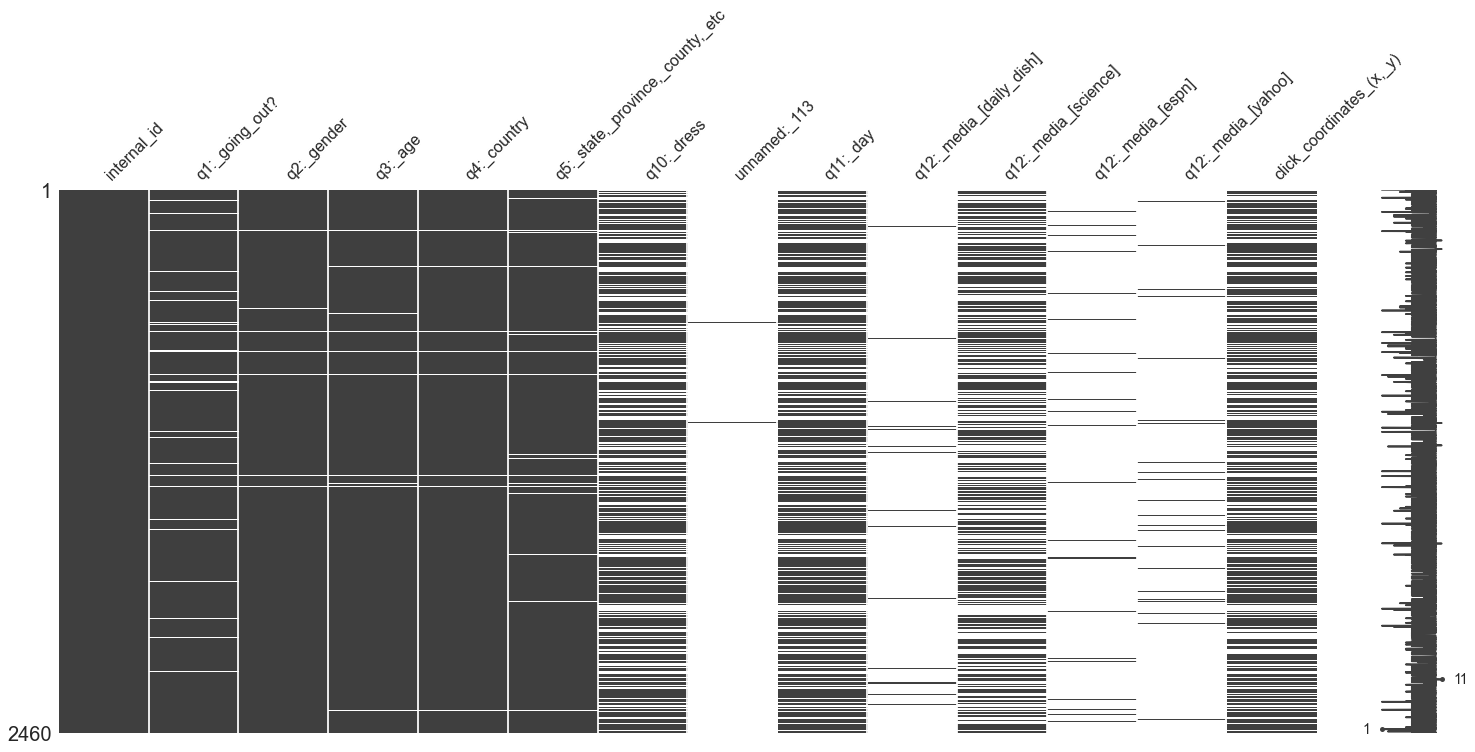

In [11]:
# whitespace indicates missing values
missingno.matrix(df);

<a id='Explor Sum'></a>
## Exploring Summary:

#####  There are many missing values.
#####  From the plot there are unnecessary columns (`Internal ID`, `Unnamed: 113`, `Click Coordinates (x, y)`).And others, but before deleting, I will deal with them.
##### Column names are too complicated.
#####  Almost all columns are of type object. This is troublesome since object can encompass many things and does not gurantee that each column has its required type.
##### There are a lot of data inconsistencies.  
##### There is nothing duplicated values!

<a id='clean'></a>
## Cleaning data :
#### 1- Column Names

In [12]:
# remove  unnecessary columns for my analysis:
df.drop(columns = ['internal_id','unnamed:_113', 'click_coordinates_(x,_y)'], inplace = True)
#checking new data shape:
df.shape

(2460, 11)

In [13]:
df.columns=df.columns.str.replace(':_','')
df.columns=df.columns.str.replace('\d+', '')
df.columns=df.columns.str.split('q').str[1]
df.columns.tolist()

['going_out?',
 'gender',
 'age',
 'country',
 'state,_province,_county,_etc',
 'dress',
 'day',
 'media_[daily_dish]',
 'media_[science]',
 'media_[espn]',
 'media_[yahoo]']

In [14]:
df = df.rename(columns ={'state,_province,_county,_etc' : 'area'})
df.head(1)

going_out? gender  age country area dress  day  media_[daily_dish]  \
0        NaN    NaN  NaN     NaN  NaN   NaN  NaN                 NaN   

   media_[science]  media_[espn]  media_[yahoo]  
0              NaN           NaN            NaN

In [15]:
df.shape

(2460, 11)

In [16]:
# Delete rows that have all NaNs
df = df.dropna(axis = 0, how = 'all')
df = df.reset_index(drop = True)
df.shape

(2437, 11)

In [17]:
# We can clearly see the minimum value, mean values, and maximum values for numerical values...
df.describe().T 

count  mean  std  min  25%  50%  75%  max
media_[daily_dish]    85.0   1.0  0.0  1.0  1.0  1.0  1.0  1.0
media_[science]     1362.0   1.0  0.0  1.0  1.0  1.0  1.0  1.0
media_[espn]          99.0   1.0  0.0  1.0  1.0  1.0  1.0  1.0
media_[yahoo]         67.0   1.0  0.0  1.0  1.0  1.0  1.0  1.0

In [18]:
# A function to convert 4 columns into 1 column
def melt1(row):
    for c in data.columns:
        if row[c] == 1:
            return c

In [19]:
data = df[df.columns[-4:]]
data 

media_[daily_dish]  media_[science]  media_[espn]  media_[yahoo]
0                    NaN              1.0           NaN            NaN
1                    NaN              NaN           NaN            NaN
2                    NaN              1.0           NaN            NaN
3                    NaN              1.0           NaN            NaN
4                    NaN              1.0           NaN            NaN
...                  ...              ...           ...            ...
2432                 NaN              NaN           NaN            NaN
2433                 NaN              1.0           NaN            NaN
2434                 NaN              1.0           NaN            NaN
2435                 NaN              NaN           NaN            NaN
2436                 1.0              NaN           NaN            NaN

[2437 rows x 4 columns]

In [20]:
new_col = data.apply(melt1, axis = 1)
df['media'] = new_col
df.drop(columns = ['media_[daily_dish]','media_[science]','media_[espn]','media_[yahoo]'], inplace = True)
df.head(3)

going_out? gender age country      area           dress     day  \
0         No   Male  44    USA         NM  White and gold  Sunday   
1        NaN   Male  49     USA  Virginia             NaN     NaN   
2         No   Male  40      us        or  White and gold  Sunday   

             media  
0  media_[science]  
1             None  
2  media_[science]

In [21]:
df.shape

(2437, 8)

In [22]:
# I want at least 5 NaN values.
df = df.dropna(thresh = 5, axis = 0)
df.shape

(2349, 8)

#### 2- Formating columns

> ### clean `media` column 

In [23]:
unique_valuecounts('media')

['media_[science]' None 'media_[daily_dish]' 'media_[yahoo]'
 'media_[espn]']

******************************

media_[science]       1356
media_[espn]            99
media_[daily_dish]      84
media_[yahoo]           66
Name: media, dtype: int64

_________________________________

NaN= 744


In [24]:
df['media'] = df['media'].fillna('media_[science]')

> ### clean `going out` column 


In [25]:
unique_valuecounts('going_out?')

['No' 'Yes' nan]

******************************

No     1989
Yes     304
Name: going_out?, dtype: int64

_________________________________

NaN= 56


In [26]:
df['going_out?'] = df['going_out?'].fillna('Not Sure')

> ###  clean ` gender` column 


In [27]:
unique_valuecounts('gender')

['Male' 'Female' "I'd rather not say" 'Other' nan]

******************************

Male                  1419
Female                 825
I'd rather not say      70
Other                   30
Name: gender, dtype: int64

_________________________________

NaN= 5


 ##### There were four possible choices for the gender question:
> ###### I will keep `Male`, `Female`, and `I'd rather not say`

In [28]:
df['gender'].fillna('Male',inplace=True)

In [29]:
df['gender']=df['gender'].replace("Other","I'd rather not say")
df["gender"].unique()

array(['Male', 'Female', "I'd rather not say"], dtype=object)

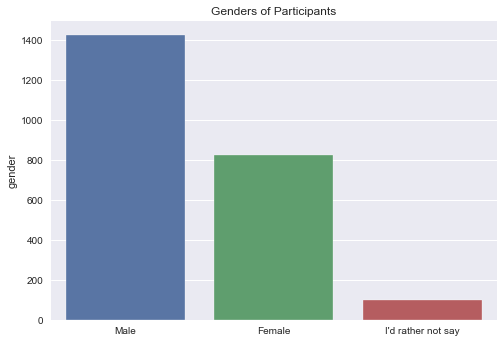

In [30]:
sns.barplot(x = df['gender'].value_counts().index,y = df['gender'].value_counts()).set_title("Genders of Participants");

> ###  clean ` age` column 

In [31]:
unique_valuecounts('age')

[44 40 23 53 33 56 64 43 37 59 48 54 36 45 49 25 34 35 38 58 50 47 16 52
 63 41 27 31 61 46 42 62 29 39 32 28 69 67 30 22 26 51 70 65 24 18 19
 'Old enough' 57 60 66 12 'Many' 55 72 '?' 21 11 'no' nan 9 68 20 6 10 71
 90 13 '45-55' 312 99 7 'hahahahaha' 88 39.4 74 102 'older than dirt' 17
 15 8 75 '5u' 'Enough' 'See question 2' '24-50' 14 'Over 50' 76 100 1000
 'sixty-nine' '46 Halloweens.' 'ancient' 77 'OLD' 'old' 73 70.5 1
 'MY NAME JEFF' 4 '59 on the day after Halloween' 'old enough' 'your mom'
 'I can remember when Java was a cool new language' '60+']

******************************

40    91
34    89
37    86
43    81
36    78
35    77
42    76
44    76
45    74
41    73
Name: age, dtype: int64

_________________________________

NaN= 22


> ##### Some of these questions allowed the user to type in their answer. This led to incorrect entries. So the `age` column has some string responses even though we only expected integers. Let's clean this up.

> ##### For age column we can use pandas' to_numeric function to filter out all the unnecessary strings.

In [32]:
df['age']=pd.to_numeric(df['age'],errors='coerce')
df['age'].unique()

array([  44. ,   40. ,   23. ,   53. ,   33. ,   56. ,   64. ,   43. ,
         37. ,   59. ,   48. ,   54. ,   36. ,   45. ,   49. ,   25. ,
         34. ,   35. ,   38. ,   58. ,   50. ,   47. ,   16. ,   52. ,
         63. ,   41. ,   27. ,   31. ,   61. ,   46. ,   42. ,   62. ,
         29. ,   39. ,   32. ,   28. ,   69. ,   67. ,   30. ,   22. ,
         26. ,   51. ,   70. ,   65. ,   24. ,   18. ,   19. ,    nan,
         57. ,   60. ,   66. ,   12. ,   55. ,   72. ,   21. ,   11. ,
          9. ,   68. ,   20. ,    6. ,   10. ,   71. ,   90. ,   13. ,
        312. ,   99. ,    7. ,   88. ,   39.4,   74. ,  102. ,   17. ,
         15. ,    8. ,   75. ,   14. ,   76. ,  100. , 1000. ,   77. ,
         73. ,   70.5,    1. ,    4. ])

> ##### Age column is now numeric as it should be and All strings were converted to NaN values.
The age column is also a free form answer, thus we can see some anomalies in this column even after elimimating non numeric answers. Let's see what we're dealing with.

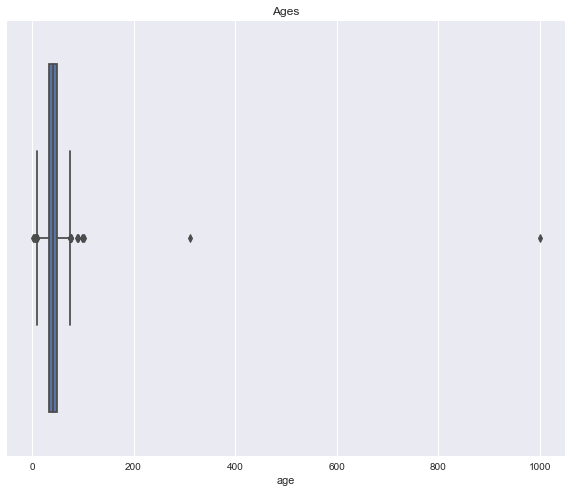

In [33]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x=df["age"]).set_title('Ages');

>> ##### As we can see we got some insane ages reported. We got people ranging from 0 to 1000 years old! So I will take a closer look at these outliers.

In [34]:
Ages = df.loc[(df.age>100) | (df.age<4)]
Ages

going_out?              gender     age   country                    area  \
502          No  I'd rather not say   312.0    Canada                      BC   
875          No  I'd rather not say   102.0         A                       A   
1486        Yes  I'd rather not say  1000.0  Atlantis  Emerald City, Petrolia   
2192        Yes  I'd rather not say     1.0         1                       1   

               dress     day            media  
502   Blue and black  Sunday  media_[science]  
875   Blue and black  Friday  media_[science]  
1486  White and gold  Friday  media_[science]  
2192             NaN     NaN  media_[science]

>> ##### As we saw ,Not only the ages are wrong, but also most of the values have no meaning.So I will get rig of them all.

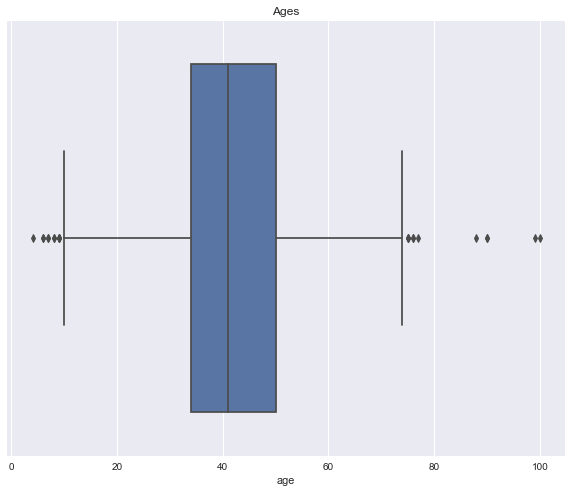

In [35]:
df.drop(Ages.index, inplace=True)
# confirming changes
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x=df["age"]).set_title('Ages');

In [36]:
df["age"].mode()

0    40.0
dtype: float64

In [37]:
df["age"].median()

41.0

>> #### Since the mode and median are very close to each other, the missing values can be filled in with either of them.

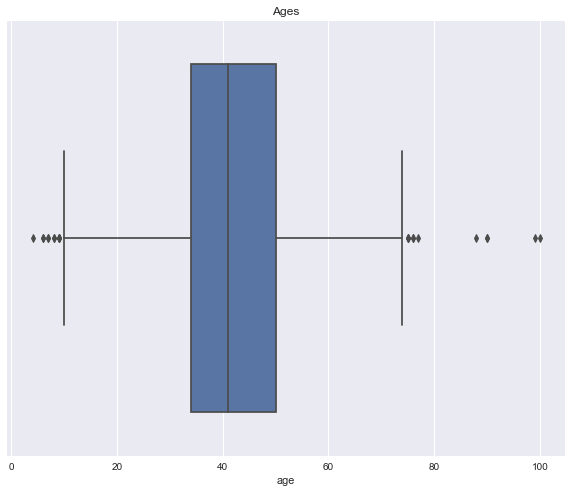

In [38]:
# fill NaN value with median
df['age'].fillna(df['age'].median(), inplace=True)
# confirming changes
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x=df["age"]).set_title('Ages');

 >> ##### To a certain degree our age column looks more reasonible now. 

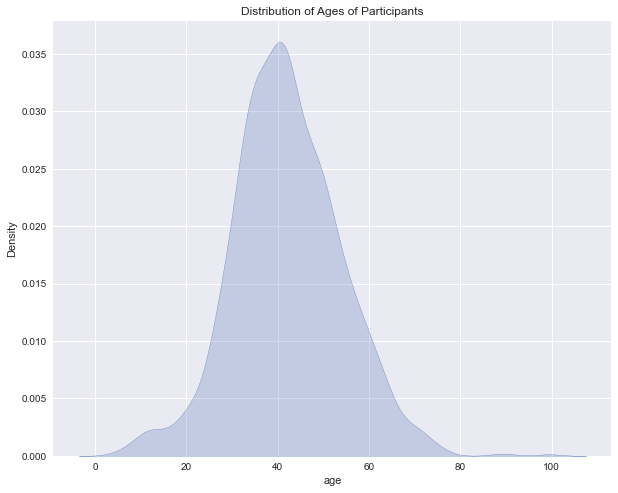

In [39]:
fig, ax = plt.subplots(figsize=(10,8))
sns.kdeplot(df['age'], shade = True).set_title("Distribution of Ages of Participants");

### 1)Most of the particpants are male.
### 2)The average participant is in their 40's.

> ###  clean ` country` column


In [40]:
unique_valuecounts('country')

['USA ' 'us' 'usa' 'canada' 'Canada' 'Us' 'US' 'Murica' 'USA'
 'United States' 'uk' 'United Kingdom' 'united states' 'Usa'
 'United States ' 'United staes' 'United States of America' 'UAE'
 'England' 'canada ' 'Mexico' 'United states' 'u.s.a.' 'USAUSAUSA'
 'america' 'france' 'United States of America ' 'U.S.A.' 'UK'
 'unhinged states' 'Canada ' 'united states of america' 'US of A'
 'Unites States' 'The United States' 'North Carolina ' nan 'Unied States'
 'Netherlands' 'germany' 'Europe' 'Earth' 'U S' 'u.s.' 'U.K. '
 'Costa Rica' 'The United States of America' 'unite states' 'U.S.'
 'cascadia' 'Australia' 'insanity lately' 'Greece'
 'USA? Hard to tell anymore..' "'merica" 'usas' 'Pittsburgh'
 'United State' 'France' 'australia' 'Can' 'Canae' 'New York' 'Trumpistan'
 'Ireland' 'United Sates' 'Korea' 'California' 'Japan' 'USa'
 'South africa'
 'I pretend to be from Canada, but I am really from the United States.'
 'Usa ' 'Uk' 'Iceland' 'Canada`' 'Scotland' 'UK ' 'Denmark'
 'United Stated'

#### People are so creative üëÄüëÄ!!
### üòíÿ®ŸäŸÇŸàŸÑŸÉ ÿØŸàŸÑ ŸÖÿ™ŸÇÿØŸÖÿ© üôÑü§¶üèº‚Äç‚ôÄÔ∏èÿ£ŸÜÿß ŸÖÿßÿ¥Ÿâ ŸäÿßÿπŸÖ 

In [41]:
df['country']=df['country'].str.lower().str.replace(' ','')
df.country.unique()

array(['usa', 'us', 'canada', 'murica', 'unitedstates', 'uk',
       'unitedkingdom', 'unitedstaes', 'unitedstatesofamerica', 'uae',
       'england', 'mexico', 'u.s.a.', 'usausausa', 'america', 'france',
       'unhingedstates', 'usofa', 'unitesstates', 'theunitedstates',
       'northcarolina', nan, 'uniedstates', 'netherlands', 'germany',
       'europe', 'earth', 'u.s.', 'u.k.', 'costarica',
       'theunitedstatesofamerica', 'unitestates', 'cascadia', 'australia',
       'insanitylately', 'greece', 'usa?hardtotellanymore..', "'merica",
       'usas', 'pittsburgh', 'unitedstate', 'can', 'canae', 'newyork',
       'trumpistan', 'ireland', 'unitedsates', 'korea', 'california',
       'japan', 'southafrica',
       'ipretendtobefromcanada,butiamreallyfromtheunitedstates.',
       'iceland', 'canada`', 'scotland', 'denmark', 'unitedstated',
       'switzerland', 'ahem....amerca', 'ud', 'southkorea', 'newjersey',
       'indonesia', 'thenetherlands', 'unitedstatss', 'endland',
       'm

In [42]:
# get the unique values with 'u'
COUNTRY=set([x for x in df['country'] if 'u' in str(x)])  
print (COUNTRY)

{'unitedstated', 'u.k.', 'uae', 'usausausa', 'u.s.', 'theunitedstatesofamerica', 'australia', 'pittsburgh', 'unhingedstates', 'u.s.a.', 'uk', 'murica', 'us', 'unitedstatss', 'trumpistan', 'subscribetodm4uz3onyoutube', 'ud', 'unitedsates', 'unitestates', 'unitesstates', 'unitedstatesofamerica', 'europe', 'unitedstates', 'theunitedstates', 'unitedstate', 'uniedstates', 'ipretendtobefromcanada,butiamreallyfromtheunitedstates.', 'unitedkingdom', 'ussa', 'usofa', 'usa?hardtotellanymore..', 'southkorea', 'unitedstatea', 'usa!usa!usa!', 'southafrica', 'usausausa!!!!', 'usas', 'unitedststes', 'unitedstaes', 'usaa', 'usa', 'murrika'}


In [43]:
USA = [x for x in df['country'] if (('u' in str(x)) and 'ingdom' not in str(x) and 'urope' not in str(x) and 'stralia' not in str(x) and 'south' not in str(x) and 'uk' not in str(x))]
df['country'] = df['country'].replace(to_replace = USA, value = 'usa')
df.country.unique()

array(['usa', 'canada', 'uk', 'unitedkingdom', 'england', 'mexico',
       'america', 'france', 'northcarolina', nan, 'netherlands',
       'germany', 'europe', 'earth', 'costarica', 'cascadia', 'australia',
       'insanitylately', 'greece', "'merica", 'can', 'canae', 'newyork',
       'ireland', 'korea', 'california', 'japan', 'southafrica',
       'iceland', 'canada`', 'scotland', 'denmark', 'switzerland',
       'ahem....amerca', 'southkorea', 'newjersey', 'indonesia',
       'thenetherlands', 'endland', 'alaska', 'n.america', 'singapore',
       'china', 'taiwan', 'hongkong', 'spain', 'sweden', 'narnia',
       "idon'tknowanymore", 'fearandloathing'], dtype=object)

In [44]:
df['country'].fillna('usa',inplace=True)

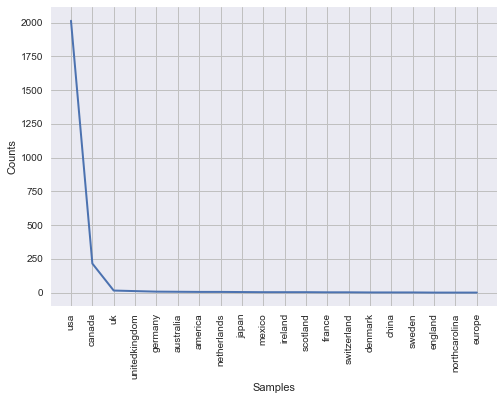

In [45]:
import nltk
freq = nltk.FreqDist(df['country'])
freq.plot(20, cumulative=False);

 There are still duplicates but at least now we got a better view of the various countries reported from.

### 1)  Although various countries from around the world participated in the survey, almost all of the participants came from North America, thus the data and the analysis reflect the preferences of the USA and Canada.
### 2) The United States contains the most entries, followed by Canada.
### 3) The United Kingdom has the most entries out of all European countries reported.

In [46]:
df['country'] = df['country'].replace(to_replace =['mer','n.america',"'merica",'northcarolina','cascadia', 'newyork','a','california','newjersey','alaska','narnia','ahem....amerca'] , value = 'usa')

In [47]:
CANDA = [x for x in df['country'] if 'can' in str(x)]
df['country'] = df['country'].replace(to_replace = CANDA, value = 'canada')

In [48]:
unique_valuecounts('country')

['usa' 'canada' 'uk' 'unitedkingdom' 'england' 'mexico' 'america' 'france'
 'netherlands' 'germany' 'europe' 'earth' 'costarica' 'australia'
 'insanitylately' 'greece' 'ireland' 'korea' 'japan' 'southafrica'
 'iceland' 'scotland' 'denmark' 'switzerland' 'southkorea' 'indonesia'
 'thenetherlands' 'endland' 'singapore' 'china' 'taiwan' 'hongkong'
 'spain' 'sweden' "idon'tknowanymore" 'fearandloathing']

******************************

usa              2023
canada            219
uk                 16
unitedkingdom      12
germany             8
australia           7
america             6
netherlands         6
japan               5
mexico              4
Name: country, dtype: int64

_________________________________

NaN= 0


In [49]:
unknown = [x for x in df['country'].unique()]
unknown.remove('usa')
unknown.remove('canada')

In [50]:
df["country"]= df["country"].replace(to_replace = unknown, value = 'unknown')
df['country'].value_counts()

usa        2023
canada      219
unknown     103
Name: country, dtype: int64

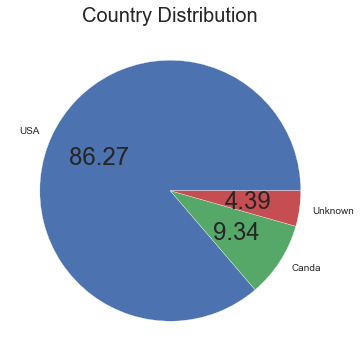

In [51]:
plt.figure(figsize=[14, 6])
plt.title("Country Distribution", fontsize = 20)
plt.pie(x=df['country'].value_counts(), autopct="%.2f", labels=['USA', 'Canda', 'Unknown']);

> ### clean ` area` column


In [52]:
unique_valuecounts('area')

['NM' 'or' 'exton pa' 'Colorado ' 'ontario' 'Ontario' 'Wa' 'Quebec' 'NY'
 'California' 'Texas' 'NEW YORK' 'CO' 'IN' 'MN' 'aberdeenshire' 'Alberta'
 'Wisconsin, 53705' 'RI' 'NC' 'Scotland' 'minnesota' 'Michigan' 'Florida'
 'New Jersey' 'VA' 'Colorado' 'Los Angeles, California' 'CA' 'New York '
 'Chicago, Illinois' 'Nj' 'Wisconsin' 'Minnesota ' 'London' 'mn' 'TEXAS'
 'Illinois' 'District of Columbia' 'Washington' 'Massachusetts ' 'OR'
 'Montana' 'New York' 'massachusetts' 'Abu Dhabi' 'TX' 'Arizona' 'Dc'
 'yukon' 'Pennsylvania ' 'MD' 'Virginia' 'Ohio' 'Alberta ' 'OXFORDSHIRE'
 'DC' 'Iowa' 'Mn' 'TN' 'BC' nan 'Maryland' 'MI' 'Wisconsin ' 'alaska' 'Ny'
 'Colorado, Jefferson county ' 'Louisiana' 'pa' 'CO, Larimer County'
 'Nebraska ' 'Oregon' 'UT' 'ny' 'Pennsylvania' 'CDMX' 'north carolina'
 'Tennessee ' 'Texas ' 'Knox county, Tennessee' 'New Mexico' 'Maine'
 'maine' 'Virginia, Arlington' 'WA' 'MO' 'Illinois ' 'Mi' 'MA' 'Alaska'
 'New York, NY' 'Il' 'PA' 'New Hampshire ' 'Washington ' 'Massac

In [53]:
df['area'].nunique() 

505

>> #### Since the number of unique values is very large, and this column does not add anything new to the insights of our dataset, especially with the presence of the country column so I will get rid of it.

In [54]:
df.drop(columns = ['area'], inplace = True)

> ###  clean ` dress` column

In [55]:
unique_valuecounts('dress')

['White and gold' nan 'Blue and black']

******************************

White and gold    1075
Blue and black     629
Name: dress, dtype: int64

_________________________________

NaN= 641


In [56]:
df['dress'].fillna('White and gold',inplace=True)
df['dress'].unique()

array(['White and gold', 'Blue and black'], dtype=object)

> ###  clean ` day` column


In [57]:
unique_valuecounts('day')

['Sunday' 'Friday' nan]

******************************

Friday    1083
Sunday     641
Name: day, dtype: int64

_________________________________

NaN= 621


In [58]:
df['day'].fillna('Friday',inplace=True)
df['day'].unique()

array(['Sunday', 'Friday'], dtype=object)

In [59]:
df.isna().sum().sort_values(ascending=False)[:5]

going_out?    0
gender        0
age           0
country       0
dress         0
dtype: int64

#### 3- Datatype conversion

In [60]:
df = df.astype({'going_out?':'category', 'gender':'category', 'country':'category','dress':'category', 'day':'category','media':'category'})
df["age"]=df["age"].astype("int")

In [61]:
# Take a sample of 10
df.sample(10)

going_out?  gender  age  country           dress     day  \
1328         No    Male   46      usa  White and gold  Friday   
1689         No  Female   38      usa  White and gold  Sunday   
630          No  Female   62      usa  White and gold  Friday   
1469         No  Female   53   canada  Blue and black  Friday   
1061         No    Male   36      usa  White and gold  Friday   
972         Yes    Male   42      usa  White and gold  Sunday   
1979        Yes    Male   43  unknown  White and gold  Friday   
1892         No    Male   43      usa  Blue and black  Friday   
2187         No  Female   72      usa  White and gold  Friday   
1801         No    Male   55      usa  White and gold  Friday   

                   media  
1328  media_[daily_dish]  
1689     media_[science]  
630      media_[science]  
1469     media_[science]  
1061     media_[science]  
972      media_[science]  
1979     media_[science]  
1892     media_[science]  
2187     media_[science]  
1801     media_[science]

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2345 entries, 0 to 2436
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   going_out?  2345 non-null   category
 1   gender      2345 non-null   category
 2   age         2345 non-null   int32   
 3   country     2345 non-null   category
 4   dress       2345 non-null   category
 5   day         2345 non-null   category
 6   media       2345 non-null   category
dtypes: category(6), int32(1)
memory usage: 42.0 KB


# df2

In [63]:
df2.head()

q6_|_100_grand_bar  \
0                NaN   
1                MEH   
2                NaN   
3                MEH   
4                JOY   

  q6_|_anonymous_brown_globs_that_come_in_black_and_orange_wrappers\t(a.k.a._mary_janes)  \
0                                                NaN                                       
1                                            DESPAIR                                       
2                                                NaN                                       
3                                            DESPAIR                                       
4                                            DESPAIR                                       

  q6_|_any_full-sized_candy_bar q6_|_black_jacks q6_|_bonkers_(the_candy)  \
0                           NaN              NaN                      NaN   
1                           JOY              MEH                  DESPAIR   
2                           NaN              NaN                      NaN   
3                           JOY              MEH                      MEH   
4                           JOY          DESPAIR                      MEH   

  q6_|_bonkers_(the_board_game) q6_|_bottle_caps q6_|_box'o'raisins  \
0                           NaN              NaN                NaN   
1                       DESPAIR          DESPAIR            DESPAIR   
2                           NaN              NaN                NaN   
3                       DESPAIR              MEH            DESPAIR   
4                       DESPAIR              MEH            DESPAIR   

  q6_|_broken_glow_stick q6_|_butterfinger q6_|_cadbury_creme_eggs  \
0                    NaN               NaN                     NaN   
1                DESPAIR           DESPAIR                     MEH   
2                    NaN               NaN                     NaN   
3                DESPAIR               MEH                     MEH   
4                DESPAIR               MEH                     MEH   

  q6_|_candy_corn  \
0             NaN   
1             MEH   
2             NaN   
3         DESPAIR   
4         DESPAIR   

  q6_|_candy_that_is_clearly_just_the_stuff_given_out_for_free_at_restaurants  \
0                                                NaN                            
1                                            DESPAIR                            
2                                                NaN                            
3                                            DESPAIR                            
4                                            DESPAIR                            

  q6_|_caramellos q6_|_cash,_or_other_forms_of_legal_tender q6_|_chardonnay  \
0             NaN                                       NaN             NaN   
1             MEH                                       JOY             MEH   
2             NaN                                       NaN             NaN   
3             MEH                                       JOY             MEH   
4             JOY                                       MEH             JOY   

  q6_|_chick-o-sticks_(we_don‚Äôt_know_what_that_is) q6_|_chiclets  \
0                                              NaN           NaN   
1                                          DESPAIR       DESPAIR   
2                                              NaN           NaN   
3                                              JOY           MEH   
4                                          DESPAIR       DESPAIR   

  q6_|_coffee_crisp q6_|_creepy_religious_comics/chick_tracts  \
0               NaN                                       NaN   
1           DESPAIR                                   DESPAIR   
2               NaN                                       NaN   
3           DESPAIR                                   DESPAIR   
4               MEH                                   DESPAIR   

  q6_|_dental_paraphenalia q6_|_dots q6_|_dove_bars q6_|_fuzzy_peaches  \
0                      NaN  

In [64]:
df2.shape

(2460, 106)

In [65]:
def missing_percentage(data_frame):
    """
    This function return take data frame and return data frame 
    with columns name, the number of missing values and the percentage 
    of them in each column.
    """
    total_missing = data_frame.isnull().sum().sort_values(ascending=False)[:30]
    total_missing = total_missing[total_missing.values !=0]
    per = np.round(total_missing.values*100.00/len(data_frame), 2)
    df = pd.DataFrame(total_missing, columns=['Number Of Missing Values'])
    return(df.assign(Percentage = per))

In [66]:
#Show Missing Values
missing_percentage(df2)

Number Of Missing Values  \
q9:_other_comments                                                      2074   
q8:_despair_other                                                       1743   
q7:_joy_other                                                           1549   
q6_|_joyjoy_(mit_iodine!)                                               1026   
q6_|_maynards                                                           1024   
q6_|_reggie_jackson_bar                                                 1014   
q6_|_bonkers_(the_board_game)                                           1006   
q6_|_sweetums_(a_friend_to_diabetes)                                    1002   
q6_|_bonkers_(the_candy)                                                 992   
q6_|_black_jacks                                                         958   
q6_|_chick-o-sticks_(we_don‚Äôt_know_what_that_is)                         946   
q6_|_kinder_happy_hippo                                                  945   
q6_|_abstained_from_m&m'ing.                                             942   
q6_|_senior_mints                                                        942   
q6_|_take_5                                                              917   
q6_|_smarties_(commonwealth)                                             901   
q6_|_spotted_dick                                                        882   
q6_|_goo_goo_clusters                                                    879   
q6_|_coffee_crisp                                                        853   
q6_|_fuzzy_peaches                                                       823   
q6_|_whatchamacallit_bars                                                823   
q6_|_now'n'laters                                                        817   
q6_|_independent_m&m's                                                   813   
q6_|_mint_juleps                                                         811   
q6_|_vials_of_pure_high_fructose_corn_syrup,_fo...                       792   
q6_|_vicodin                                                             789   
q6_|_sandwich-sized_bags_filled_with_booberry_c...                       776   
q6_|_mint_kisses                                                         776   
q6_|_bottle_caps                                                         765   
q6_|_green_party_m&m's                                                   764   

                                                    Percentage  
q9:_other_comments                                       84.31  
q8:_despair_other                                        70.85  
q7:_joy_other                                            62.97  
q6_|_joyjoy_(mit_iodine!)                                41.71  
q6_|_maynards                                            41.63  
q6_|_reggie_jackson_bar                                  41.22  
q6_|_bonkers_(the_board_game)                            40.89  
q6_|_sweetums_(a_friend_to_diabetes)                     40.73  
q6_|_bonkers_(the_candy)                                 40.33  
q6_|_black_jacks                                         38.94  
q6_|_chick-o-sticks_(we_don‚Äôt_know_what_that_is)         38.46  
q6_|_kinder_happy_hippo                                  38.41  
q6_|_abstained_from_m&m'ing.                             38.29  
q6_|_senior_mints                                        38.29  
q6_|_take_5                                              37.28  
q6_|_smarties_(commonwealth)                             36.63  
q6_|_spotted_dick                                        35.85  
q6_|_goo_goo_clusters                                    35.73  
q6_|_coffee_crisp                                        34.67  
q6_|_fuzzy_peaches                                       33.46  
q6_|_whatchamacallit_bars                                33.46  
q6_|_now'n'laters                                        33.21  
q6_|_independent_m&m's                                   33.05  
q6_|_mi

In the context of this problem, missing values are extremely useful in shedding some light on the current candy market. If we think about why a person would leave an answer to a question blank, the reason is likely because they are unfamiliar with the candy or the candy has no made a significant impact on them. This information can tell companies where to market their product next so that more people are familiar with it.

#### Now we will be counting the amount of 'JOY' answers for each candy to give us a measure of what are the most loved candies

In [67]:
cols = df2.columns
candy_cols = []
for i in range(len(cols)):
    if 'q6' in cols[i]:
        candy_cols.append(cols[i])

In [68]:
import math
candy_dict = {}
for i in range(len(candy_cols)):
    curr = df2[candy_cols[i]]
    #check for nan values
    nul_list = pd.isnull(curr)
    #extract candy name
    name = candy_cols[i]
    #counter for 'JOY responses'
    count = 0
    for j in range(len(curr)):
        if((not nul_list[j]) and curr[j] == 'JOY'):
            count = count + 1
    candy_dict[count] = name
candy_dict    

{873: 'q6_|_100_grand_bar',
 176: 'q6_|_anonymous_brown_globs_that_come_in_black_and_orange_wrappers\t(a.k.a._mary_janes)',
 1559: 'q6_|_any_full-sized_candy_bar',
 92: 'q6_|_black_jacks',
 116: 'q6_|_bonkers_(the_candy)',
 193: 'q6_|_bonkers_(the_board_game)',
 465: 'q6_|_bottle_caps',
 117: 'q6_|_whole_wheat_anything',
 24: 'q6_|_broken_glow_stick',
 1177: 'q6_|_butterfinger',
 820: 'q6_|_cadbury_creme_eggs',
 478: 'q6_|_candy_corn',
 39: 'q6_|_candy_that_is_clearly_just_the_stuff_given_out_for_free_at_restaurants',
 953: 'q6_|_caramellos',
 1439: 'q6_|_cash,_or_other_forms_of_legal_tender',
 1040: 'q6_|_chardonnay',
 299: 'q6_|_chick-o-sticks_(we_don‚Äôt_know_what_that_is)',
 244: 'q6_|_chiclets',
 474: 'q6_|_coffee_crisp',
 246: 'q6_|_creepy_religious_comics/chick_tracts',
 91: 'q6_|_real_housewives_of_orange_county_season_9_blue-ray',
 410: 'q6_|_dots',
 1176: 'q6_|_dove_bars',
 402: 'q6_|_fuzzy_peaches',
 162: 'q6_|_generic_brand_acetaminophen',
 612: 'q6_|_glow_sticks',
 409: 'q

#### We now have a dictionary mapping the JOY counts to the name of the candy. Now from this dictionary, I will extract the top 10 best and worst candies

In [69]:
keys = []
for key in candy_dict.keys():
    keys.append(key)
keys.sort(reverse = True)

#top 10 values
top10 = keys[:10]

#top 10 candy names
top10_names = []
for i in range(len(top10)):
    top10_names.append(candy_dict[top10[i]])

keys.sort()
worst10 = keys[:10]

worst10_names = []
for i in range(len(worst10)):
    worst10_names.append(candy_dict[worst10[i]])

#### First, lets look at the worst 10 candies. I split the results into two graphs to prevent overlaps in the x axis labels.

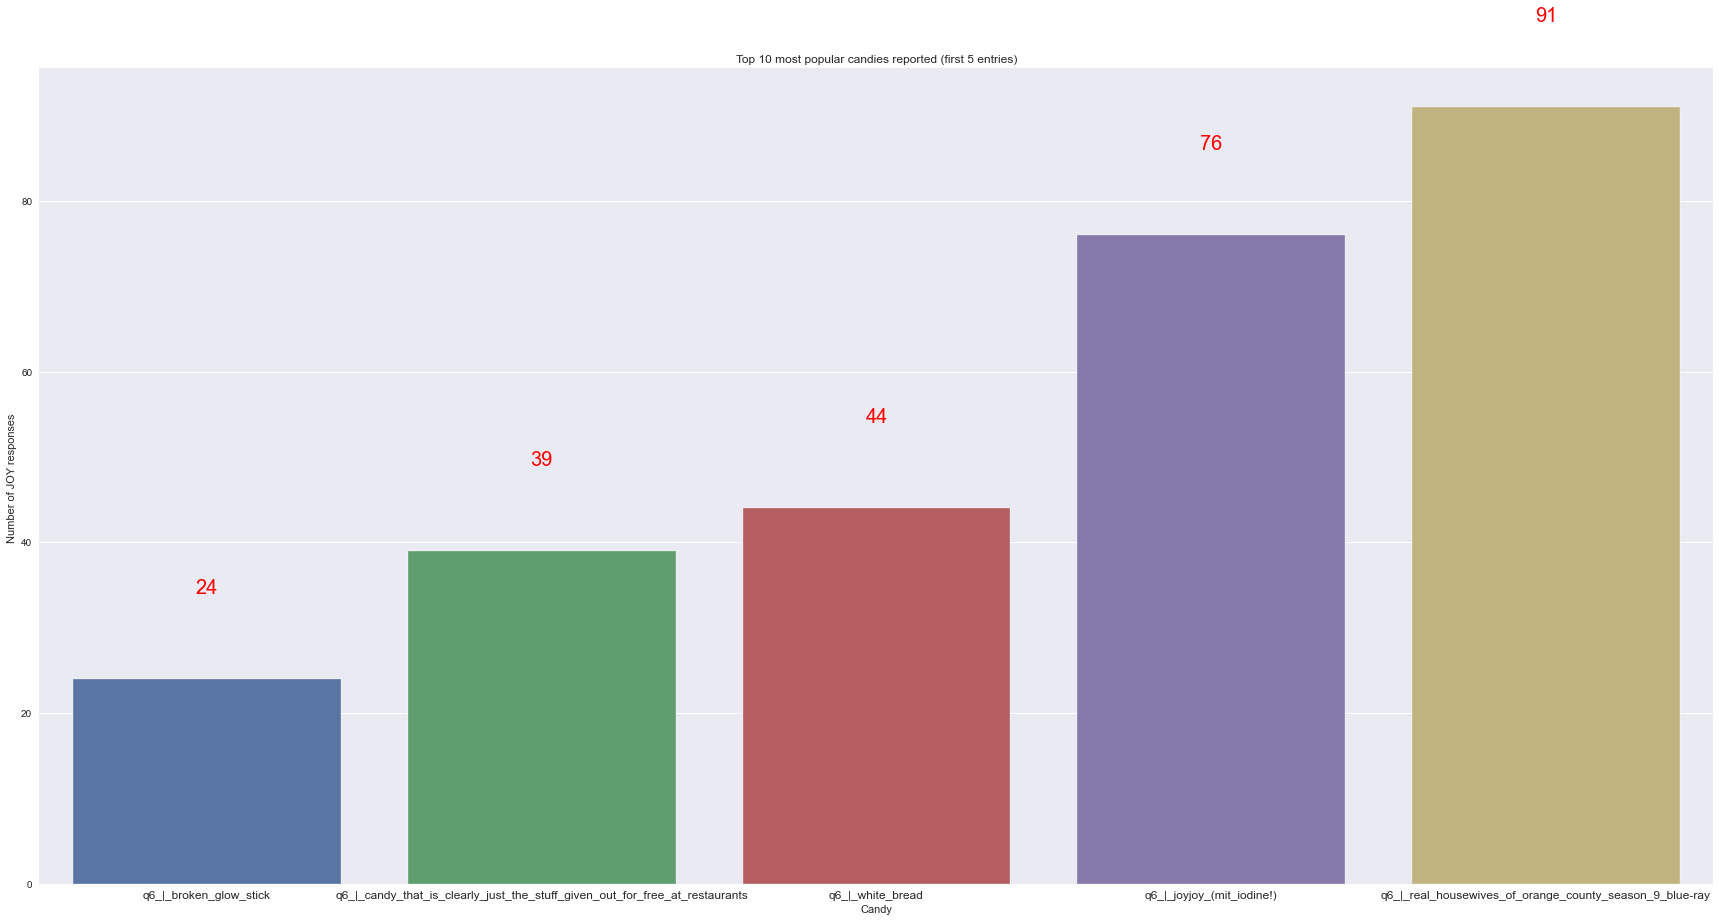

In [70]:
fig, ax = plt.subplots(figsize=(30,15))
ax.set(xlabel='Candy', ylabel='Number of JOY responses ')
plt.xticks(fontsize=12)

g = sns.barplot(x = worst10_names[:len(worst10) // 2], y = worst10[:len(worst10) // 2]).set_title("Top 10 most popular candies reported (first 5 entries)")
for i in range(len(top10) // 2):
    ax.text(i,worst10[i] + 10, worst10[i], fontsize = 20,horizontalalignment='center',color='red')
plt.show()

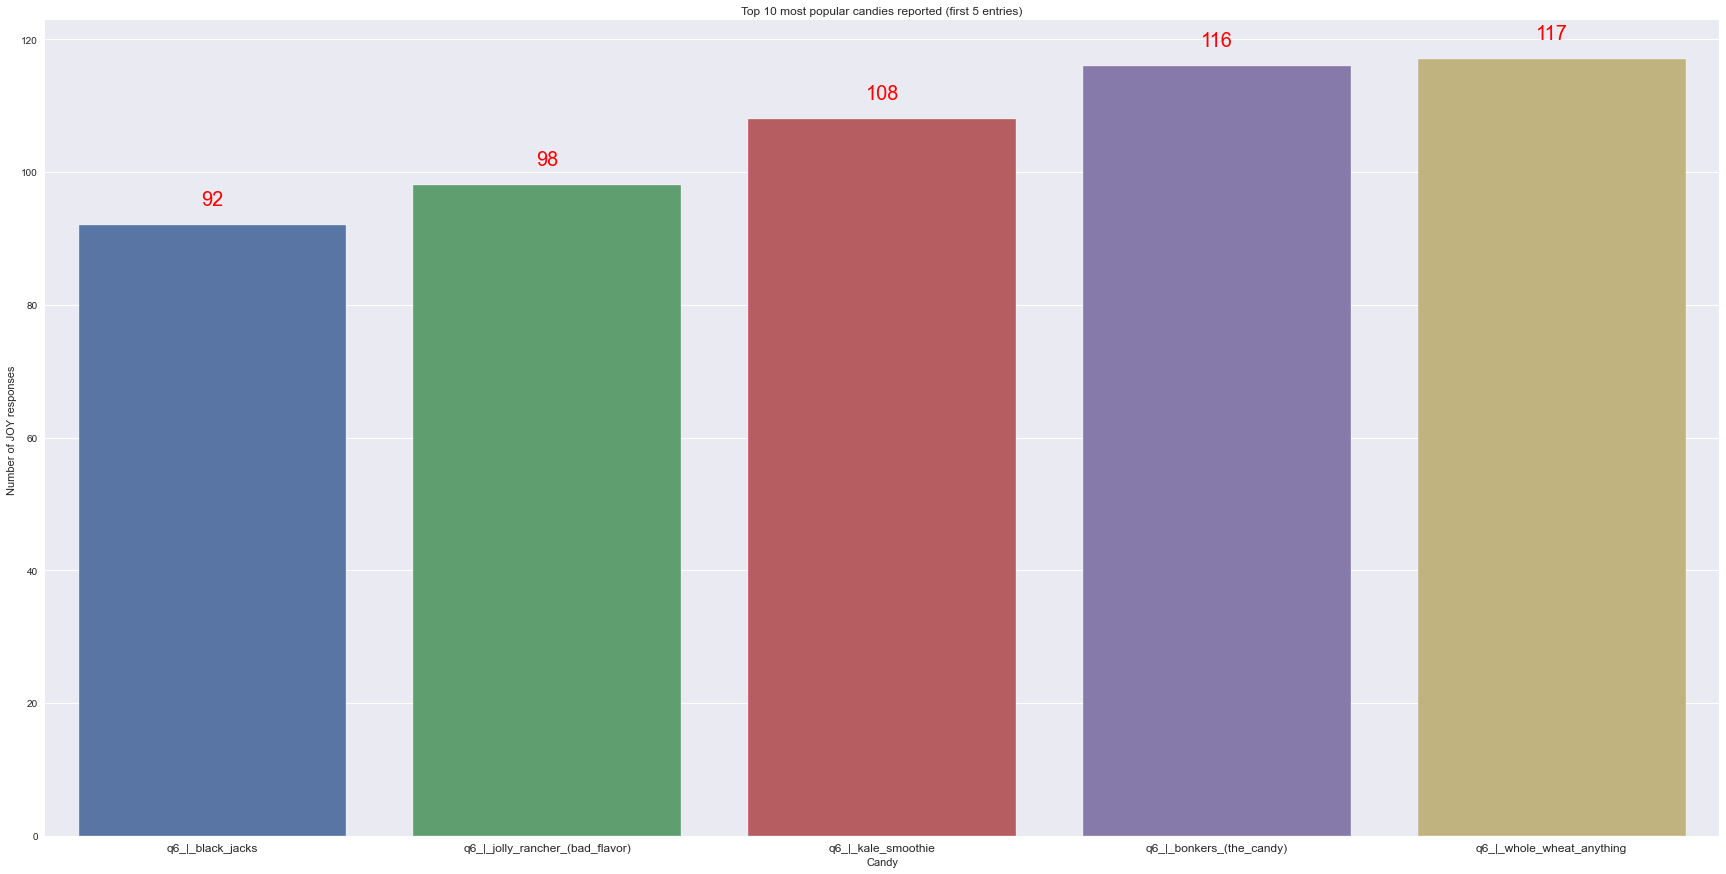

In [71]:
fig, ax = plt.subplots(figsize=(30,15))
ax.set(xlabel='Candy', ylabel='Number of JOY responses ')
plt.xticks(fontsize=12)

g = sns.barplot(x = worst10_names[len(worst10) // 2:], y = worst10[len(worst10) // 2:]).set_title("Top 10 most popular candies reported (first 5 entries)")
for i in range(len(top10) // 2,len(top10)):
    ax.text(i - len(top10) // 2,worst10[i] + 3, worst10[i], fontsize = 20,horizontalalignment='center',color='red')
plt.show()

Although some of the satirical responses made their way into the bottom 10 we can still see some intersting patterns
Observations:
1) Glow sticks are the least popular type of item.

2) Hard candies are not very popular( Jolly Rancher and implicitly restaurant candy).

3) Fruit candies are some of the least favored( Jolly Rancher, Bonkers)Next, lets look at the top 10 candies.

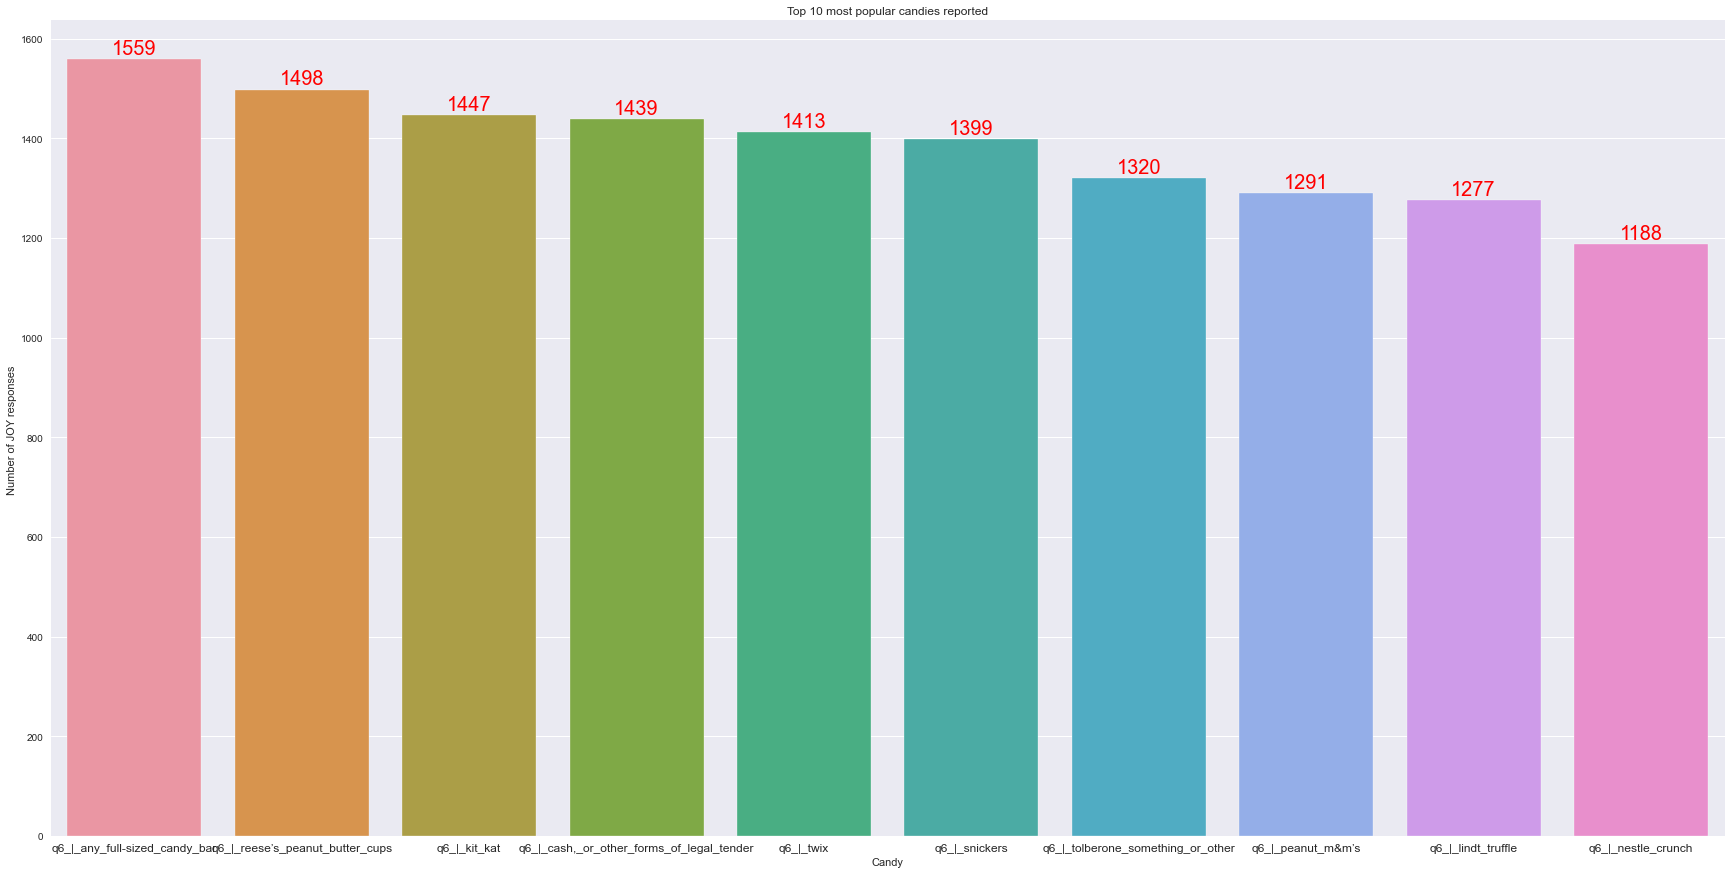

In [72]:
fig, ax = plt.subplots(figsize=(30,15))
ax.set(xlabel='Candy', ylabel='Number of JOY responses ')
plt.xticks(fontsize=12)

g = sns.barplot(x = top10_names, y = top10).set_title("Top 10 most popular candies reported")
for i in range(len(top10)):
    ax.text(i,top10[i] + 10, top10[i], fontsize = 20,horizontalalignment='center',color='red')
plt.show()

Observations:

1)Barring the obvious joke response (i.e: "cash") it is clear that chocolate is the dominant type of candy during halloween. All of the top 10 repsonses are some form of chocolate.

2) The candy bar is the most popular type of candy prefered.

3) Peanut butter based candies have a noticable presence in the top 10 ( Reeses, Peanut M&M's) as well as caramel chocolate candies(Kit Kat, Twix, Snickers).

4) It seems that a crunchy texture in a treat is popular since 3 of the top 10 candies have this kind of texture (Kit Kat, Twix, Nestle Crunch).

<a id='Conclusion'></a>

## Conclusions:

1) If you were to devise the next big candy your best bet would be to create a new type of chocolate bar with a twist. Observations of the top 10 candies revealed that people enjoyed chocolate with different textures or flavors.Perhaps a new chocolate bar that has a unique texture and an added extra layer of flavor( caramel, peanut butter etc...) could be the next big hit!

2) Avoid producing hard candies. Analysis of the worst reported candies revealed that generic hard fruit candies are the least favored amongst Halloween goers.

3) It is possible that this data is biased towards an older generation since most of the people who took the survey reported their age to be in their 40's (refer to age distribuition graph).

In [73]:
# Delete rows that have all NaNs
df2 = df2.dropna(axis = 0, how = 'all')
df2 = df2.reset_index(drop = True)
df2.shape

(1804, 106)

In [74]:
###responses = len(df2) - df2.isna().sum(axis = 1)
###df2['responses'] = responses
# To ensure that the column does not contain any missing values
###df2['responses'].isna().sum()

In [75]:
df2.drop(columns = ['q9:_other_comments','q7:_joy_other','q8:_despair_other'], inplace = True)
df2.shape

(1804, 103)

In [76]:
# Check if the data contain duplicated values or not 
df2.duplicated().sum()

0

#### Formating columns

> ###  clean ` Q6` columns

In [77]:
# columns renaming
re = ['type_'+ str(x) for x in range(1,104)]

dic = {}
for i in range(len(df2.columns)-1):
    dic[df2.columns[i]] = re[i]

In [78]:
df2 = df2.rename(columns = dic)
df2.head(1)

type_1   type_2 type_3 type_4   type_5   type_6   type_7   type_8   type_9  \
0    MEH  DESPAIR    JOY    MEH  DESPAIR  DESPAIR  DESPAIR  DESPAIR  DESPAIR   

   type_10 type_11 type_12  type_13 type_14 type_15 type_16  type_17  type_18  \
0  DESPAIR     MEH     MEH  DESPAIR     MEH     JOY     MEH  DESPAIR  DESPAIR   

   type_19  type_20  type_21 type_22 type_23  type_24  type_25  type_26  \
0  DESPAIR  DESPAIR  DESPAIR     MEH     JOY  DESPAIR  DESPAIR  DESPAIR   

   type_27 type_28  type_29 type_30 type_31  type_32 type_33 type_34 type_35  \
0  DESPAIR     MEH  DESPAIR     MEH     MEH  DESPAIR     MEH     JOY     JOY   

  type_36  type_37  type_38 type_39  type_40  type_41  type_42  type_43  \
0     MEH  DESPAIR  DESPAIR     MEH  DESPAIR  DESPAIR  DESPAIR  DESPAIR   

   type_44 type_45  type_46 type_47 type_48 type_49 type_50  type_51  type_52  \
0  DESPAIR     JOY  DESPAIR     MEH     MEH     JOY     MEH  DESPAIR  DESPAIR   

   type_53 type_54 type_55 type_56 type_57 type_58 type_59 type_60 type_61  \
0  DESPAIR     MEH     MEH     JOY     JOY     MEH     JOY     JOY     JOY   

  type_62  type_63  type_64 type_65  type_66  type_67  type_68  type_69  \
0     JOY  DESPAIR  DESPAIR     MEH  DESPAIR  DESPAIR  DESPAIR  DESPAIR   

  type_70  type_71  type_72  type_73  type_74  type_75 type_76 type_77  \
0     JOY  DESPAIR  DESPAIR  DESPAIR  DESPAIR  DESPAIR     JOY     JOY   

   type_78 type_79  type_80  type_81  type_82  type_83 type_84  type_85  \
0  DESPAIR     JOY  DESPAIR  DESPAIR  DESPAIR  DESPAIR     MEH  DESPAIR   

   type_86 type_87  type_88 type_89  type_90  type_91  type_92  type_93  \
0  DESPAIR     MEH  DESPAIR     MEH  DESPAIR  DESPAIR  DESPAIR  DESPAIR   

  type_94 type_95  type_96 type_97  type_98  type_99 type_100 type_101  \
0     JOY     JOY  DESPAIR     JOY  DESPAIR  DESPAIR  DESPAIR  DESPAIR   

  type_102 q6_|_york_peppermint_patties  
0  DESPAIR                      DESPAIR

In [79]:
#Fill missing values with mode
for col in (df2):
    X=df2[col].mode(dropna=False)[0]
    df2[col].fillna(X,inplace=True)

In [80]:
df2.isna().sum().sort_values(ascending=False)[:5]

type_1     0
type_66    0
type_76    0
type_75    0
type_74    0
dtype: int64

In [81]:
# casting columns datatype as category 
for col in (df2):
    df2 = df2.astype({col:'category'})
# except for responses column ,will be int
#df2["responses"]=df2["responses"].astype("int")    

In [82]:
df2.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1804 entries, 0 to 1803
Data columns (total 103 columns):
 #    Column                        Non-Null Count  Dtype   
---   ------                        --------------  -----   
 0    type_1                        1804 non-null   category
 1    type_2                        1804 non-null   category
 2    type_3                        1804 non-null   category
 3    type_4                        1804 non-null   category
 4    type_5                        1804 non-null   category
 5    type_6                        1804 non-null   category
 6    type_7                        1804 non-null   category
 7    type_8                        1804 non-null   category
 8    type_9                        1804 non-null   category
 9    type_10                       1804 non-null   category
 10   type_11                       1804 non-null   category
 11   type_12                       1804 non-null   category
 12   type_13                       18